In [0]:
!nvidia-smi

Sat Jun  6 03:35:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:

!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13627, done.
remote: Total 13627 (delta 0), reused 0 (delta 0), pack-reused 13627
Receiving objects: 100% (13627/13627), 12.23 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (9297/9297), done.


In [0]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet/'
/content/darknet/darknet


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content/darknet
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 AI  'Colab Notebooks'	 Images


In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [0]:
%cd /content/

/content


In [0]:
!cp /mydrive/AI/obj.zip ../

In [0]:
!unzip ../obj.zip -d darknet/data/

Archive:  ../obj.zip
   creating: darknet/data/obj/
  inflating: darknet/data/obj/0002.JPEG  
  inflating: darknet/data/obj/0002.txt  
  inflating: darknet/data/obj/0004.JPEG  
  inflating: darknet/data/obj/0004.txt  
  inflating: darknet/data/obj/0005.JPEG  
  inflating: darknet/data/obj/0005.txt  
  inflating: darknet/data/obj/0006.JPEG  
  inflating: darknet/data/obj/0006.txt  
  inflating: darknet/data/obj/0007.JPEG  
  inflating: darknet/data/obj/0007.txt  
  inflating: darknet/data/obj/0008.JPEG  
  inflating: darknet/data/obj/0008.txt  
  inflating: darknet/data/obj/0011.JPEG  
  inflating: darknet/data/obj/0011.txt  
  inflating: darknet/data/obj/0012.JPEG  
  inflating: darknet/data/obj/0012.txt  
  inflating: darknet/data/obj/0013.JPEG  
  inflating: darknet/data/obj/0013.txt  
  inflating: darknet/data/obj/0018.JPEG  
  inflating: darknet/data/obj/0018.txt  
  inflating: darknet/data/obj/0020.JPEG  
  inflating: darknet/data/obj/0020.txt  
  inflating: darknet/data/obj/0025.

In [0]:
%cd darknet/

[Errno 20] Not a directory: 'darknet/'
/content/darknet/darknet


In [0]:
!cp /mydrive/AI/yolo_custom.cfg cfg/

In [0]:
!cp /mydrive/AI/obj.names data/
!cp /mydrive/AI/obj.data data/

In [0]:
!cp /mydrive/AI/script.py ./

In [0]:
!python script.py

Traceback (most recent call last):
  File "script.py", line 4, in <module>
    os.chdir(os.path.join("data", "obj"))
FileNotFoundError: [Errno 2] No such file or directory: 'data/obj'


In [0]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [0]:
%cd ..

/content/darknet


In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-06 03:34:15--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-06 03:34:16--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... ^C


In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolo_custom.cfg darknet53.conv.74 -dont_show
# uncomment it and run to restart your model training from the last iteration it crashed

#!./darknet detector train data/obj.data cfg/yolo_custom.cfg /mydrive/AI/yolo_custom_last.weights -dont_show

In [0]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolo_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolo_custom.cfg
%cd ..

/content/darknet/darknet/cfg
/content/darknet/darknet


In [0]:
!./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/AI/yolo_custom_last.weights /mydrive/Images/fTm5x.jpg -Paint-Scratch-Remover.jpg -thresh 0.3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

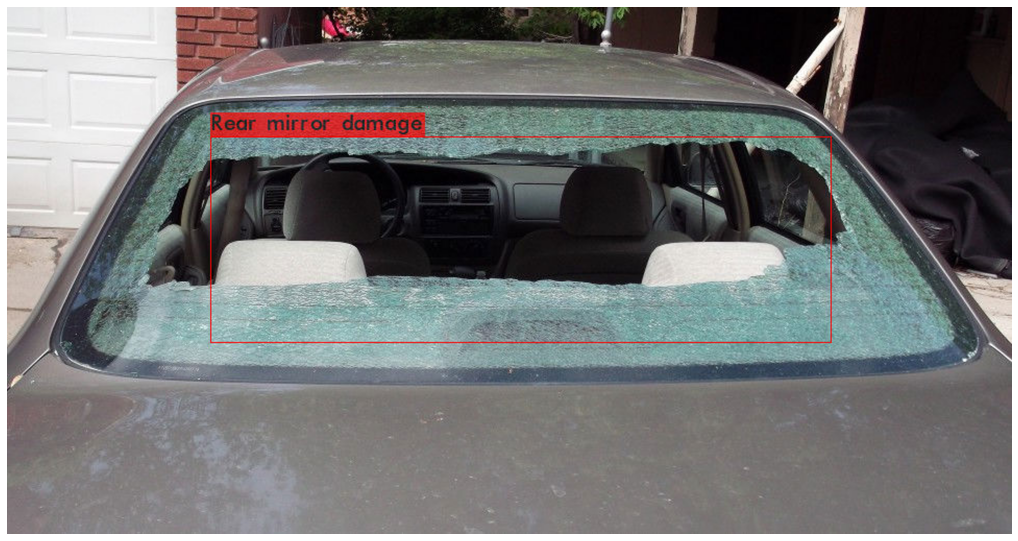

In [0]:
imShow('predictions.jpg')